# Preprocessing

We want to see how different preprocessing techniques affect our dataset.

In [94]:
# The percentage of information we want to keep
RATIO = 0.90

# RATIO = 0.95

In [95]:
from preprocessing import load_dataset, split_dataset, grid_search, corresponding_features_custom_interaction
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

First, we import our dataset and we split it.

In [96]:
# first, we load the dataset
X, y = load_dataset('./data/data.pkl')
# then, we split it
X_tr, y_tr, X_te, y_te = split_dataset(X, y, test=0.2, stratify=True)

# Scale the features
scaler = StandardScaler()

### 1. Without interaction
We scale the features.

In [97]:
X_tr_scaled = scaler.fit_transform(X_tr)

We use PCA to get the list of features and plot which ones have the most explanatory power, or have the most variance: these are the principle components.

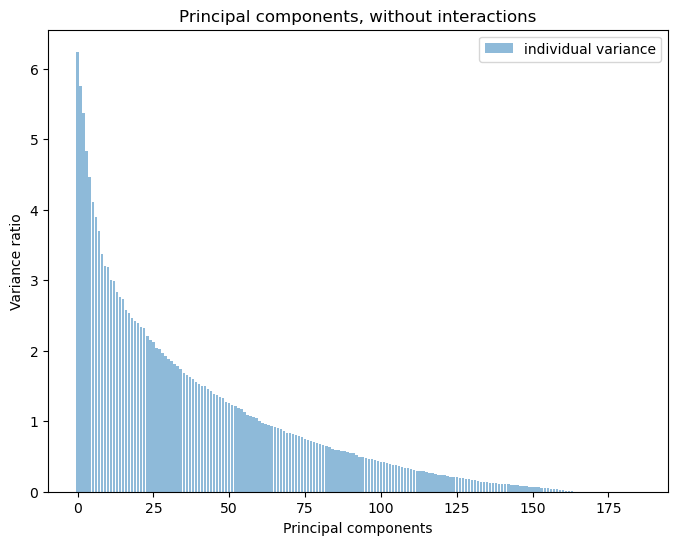

In [98]:
# Visualize
pca = PCA()
pca.fit_transform(X_tr_scaled)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.title('Principal components, without interactions')
plt.bar(range(pca_variance.size), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

Now, we want to see how many features explain 90-95% of our dataset.

In [99]:
bound_variance = np.sum(pca_variance)*RATIO
sum_variance = 0

for i in range(pca_variance.size):
    sum_variance = pca_variance[i] + sum_variance
    if sum_variance >= bound_variance:
        useful_feats = i
        break

print(f'Ratio: {RATIO}, bound variance: {bound_variance}')
print(f'---> Useful feats: {i}')
print(f'\tVariance sum: {sum_variance}')
print(f'\tPercentage: {sum_variance*100/np.sum(pca_variance):.2f} %')

Ratio: 0.9, bound variance: 158.48398727465542
---> Useful feats: 87
	Variance sum: 158.54798740291565
	Percentage: 90.04 %


These results suggest that 104-124 features are enough to represent 90-95% of our data.

### 2. With interactions (and no drop)

We repeat the previous operations, to see how the interaction affects our results.

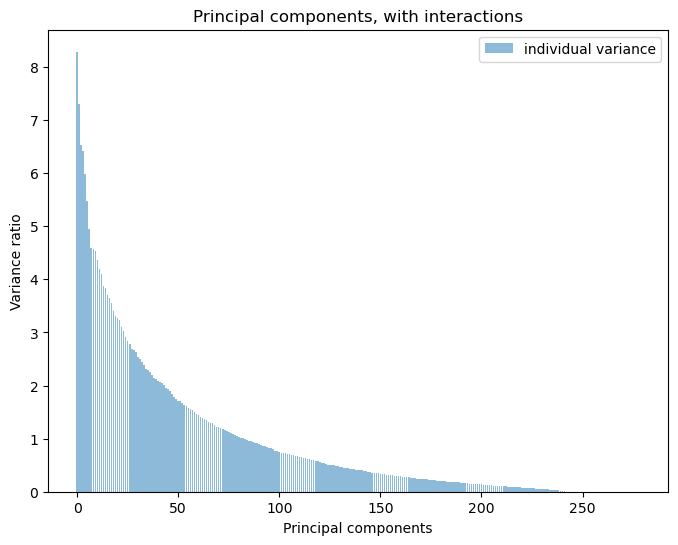

In [100]:
X_tr_int = corresponding_features_custom_interaction(X_tr, drop=False)
X_tr_scaled = scaler.fit_transform(X_tr_int)

# Visualize
pca = PCA()
pca.fit_transform(X_tr_scaled)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.title('Principal components, with interactions')
plt.bar(range(pca_variance.size), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [101]:
bound_variance = np.sum(pca_variance)*RATIO
sum_variance = 0

for i in range(pca_variance.size):
    sum_variance = pca_variance[i] + sum_variance
    if sum_variance >= bound_variance:
        useful_feats = i
        break

print(f'Ratio: {RATIO}, bound variance: {bound_variance}')
print(f'---> Useful feats: {i}')
print(f'\tVariance sum: {sum_variance}')
print(f'\tPercentage: {sum_variance*100/np.sum(pca_variance):.2f} %')

Ratio: 0.9, bound variance: 241.32788971367992
---> Useful feats: 121
	Variance sum: 241.3620299264979
	Percentage: 90.01 %


### 3. With interactions and drop

We repeat the previous operations, to see how the interaction affects our results.

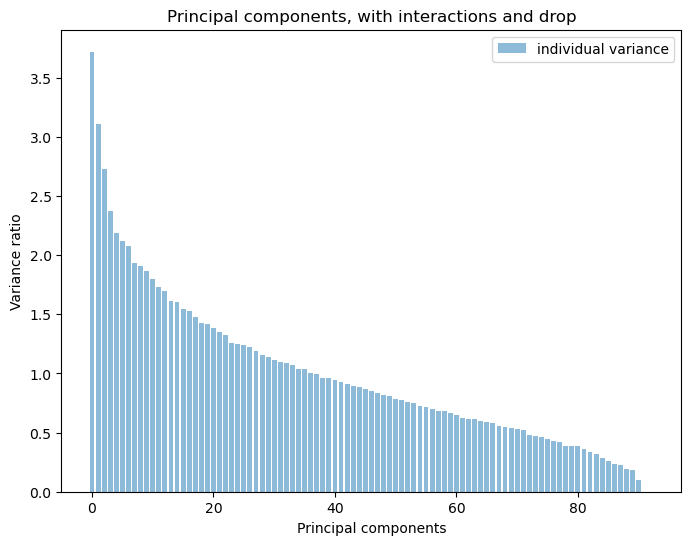

In [102]:
X_tr_int = corresponding_features_custom_interaction(X_tr, drop=True)
X_tr_scaled = scaler.fit_transform(X_tr_int)

# Visualize
pca = PCA()
pca.fit_transform(X_tr_scaled)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.title('Principal components, with interactions and drop')
plt.bar(range(pca_variance.size), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [103]:
bound_variance = np.sum(pca_variance)*RATIO
sum_variance = 0

for i in range(pca_variance.size):
    sum_variance = pca_variance[i] + sum_variance
    if sum_variance >= bound_variance:
        useful_feats = i
        break

print(f'Ratio: {RATIO}, bound variance: {bound_variance}')
print(f'---> Useful feats: {i}')
print(f'\tVariance sum: {sum_variance}')
print(f'\tPercentage: {sum_variance*100/np.sum(pca_variance):.2f} %')

Ratio: 0.9, bound variance: 82.84390243902438
---> Useful feats: 66
	Variance sum: 82.97981570620031
	Percentage: 90.15 %
